# **Statistical Experiment of OCR Results**
#### Test: Paired T-Test repeated for different OCR softwares

In [48]:
from pandas import *
import matplotlib.pyplot as plt
from numpy import *
from scipy.optimize import curve_fit
from scipy import stats

#### **Dataset Creation:**
##### There are low resolution images of the same document, the entirety Moby Dick. Each chapter is also divided into a different folder, giving us 136 sets of documents to analyze. In this section I create the dataset to analyze.

In [2]:
florence_evaluation = read_csv('/home/darshewskijadmin@consilio.com/ExperimentalLLMs/Data/FlorenceEvaluation.csv')
llava_evaluation = read_csv('/home/darshewskijadmin@consilio.com/ExperimentalLLMs/Data/LLaVAEvaluation.csv')
phi_evaluation = read_csv('/home/darshewskijadmin@consilio.com/ExperimentalLLMs/Data/PhiEvaluation.csv')
tesseract_evaluation = read_csv('/home/darshewskijadmin@consilio.com/ExperimentalLLMs/Data/TesseractEvaluation.csv')

In [3]:
florence_error_rate = read_csv('/home/darshewskijadmin@consilio.com/ExperimentalLLMs/Data/Florence_Error_Rate.csv')
llava_error_rate = read_csv('/home/darshewskijadmin@consilio.com/ExperimentalLLMs/Data/LLaVA_Error_Rate.csv')
phi_error_rate = read_csv('/home/darshewskijadmin@consilio.com/ExperimentalLLMs/Data/Phi_Error_Rate.csv')
tesseract_error_rate = read_csv('/home/darshewskijadmin@consilio.com/ExperimentalLLMs/Data/Tesseract_Error_Rate.csv')

In [4]:
florence_evaluation.rename(columns = {'Accuracy': 'Florence2 Accuracy', 'Precision': 'Florence2 Precision', 'Recall': 'Florence2 Recall', 'F1 Score': 'Florence2 F1 Score'}, inplace = True)
llava_evaluation.rename(columns = {'Accuracy': 'LLaVA-NeXT Accuracy', 'Precision': 'LLaVA-NeXT Precision', 'Recall': 'LLaVA-NeXT Recall', 'F1 Score': 'LLaVA-NeXT F1 Score'}, inplace = True)
phi_evaluation.rename(columns = {'Accuracy': 'Phi-3-Vision Accuracy', 'Precision': 'Phi-3-Vision Precision', 'Recall': 'Phi-3-Vision Recall', 'F1 Score': 'Phi-3-Vision F1 Score'}, inplace = True)
tesseract_evaluation.rename(columns = {'Accuracy': 'Tesseract Accuracy', 'Precision': 'Tesseract Precision', 'Recall': 'Tesseract Recall', 'F1 Score': 'Tesseract F1 Score'}, inplace = True)

aa = merge(florence_evaluation, llava_evaluation, on = 'Filename')
bb = merge(phi_evaluation, tesseract_evaluation, on = 'Filename')

evaluation = merge(aa, bb, on = 'Filename')

florence_error_rate.rename(columns = {'CER': 'Florence2 CER', 'WER': 'Florence2 WER'}, inplace = True)
llava_error_rate.rename(columns = {'CER': 'LLaVA-NeXT CER', 'WER': 'LLaVA-NeXT WER'}, inplace = True)
phi_error_rate.rename(columns = {'CER': 'Phi-3-Vision CER', 'WER': 'Phi-3-Vision WER'}, inplace = True)
tesseract_error_rate.rename(columns = {'CER': 'Tesseract CER', 'WER': 'Tesseract WER'}, inplace = True)


cc = merge(florence_error_rate, llava_error_rate, on = 'Filename')
dd = merge(phi_error_rate, tesseract_error_rate, on = 'Filename')

error_rate = merge(cc, dd, on = 'Filename')

# This benchmark csv will be the dataset that we use
benchmark = merge(evaluation, error_rate, on = 'Filename')

#### **Hypothesis Testing:**
##### First Null Hypothesis (H0): The accuracy of Phi-3-Vision, Florence2, or LLaVA-NeXT is equal to the accuracy of Tesseract.
##### First Alternative Hypothesis (H1): The accuracy of Phi-3-Vision, Florence2, or LLaVA-NeXT is not equal to the accuracy of Tesseract.
##### Experiment: Paired Sample T-test

Paired t-test results (Phi-3-Vision vs. Tesseract): t-statistic = -21.4193, p-value = 0.0000
Paired t-test results (Florence2 vs. Tesseract): t-statistic = -110.5287, p-value = 0.0000
Paired t-test results (LLaVA-NeXT vs. Tesseract): t-statistic = -100.0930, p-value = 0.0000
The accuracy of Phi-3-Vision is significantly different from Tesseract (after Bonferroni correction). The null hypothesis is rejected.
The accuracy of Florence2 is significantly different from Tesseract (after Bonferroni correction). The null hypothesis is rejected.
The accuracy of LLaVA-NeXT is significantly different from Tesseract (after Bonferroni correction). The null hypothesis is rejected.


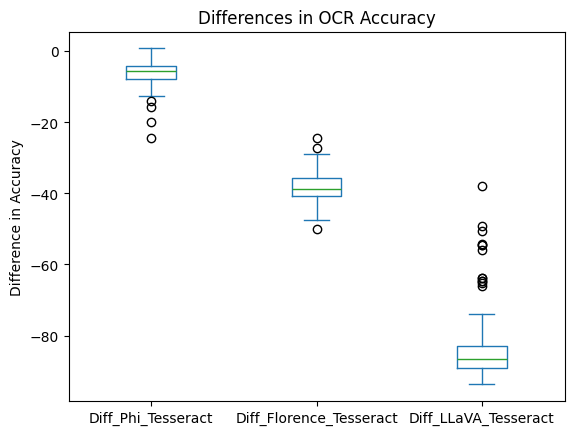

In [5]:
# Loading in the data
accuracy_data = {
    'Filename': benchmark['Filename'],
    'Tesseract': benchmark['Tesseract Accuracy'] * 100,
    'Phi-3-Vision': benchmark['Phi-3-Vision Accuracy'] * 100,
    'Florence2': benchmark['Florence2 Accuracy'] * 100,
    'LLaVA-NeXT': benchmark['LLaVA-NeXT Accuracy'] * 100
}

# Converting to a dataframe for experimentation
accuracy_df = DataFrame(accuracy_data)

# Calculate differences between models 
accuracy_df['Diff_Phi_Tesseract'] = accuracy_df['Phi-3-Vision'] - accuracy_df['Tesseract']
accuracy_df['Diff_Florence_Tesseract'] = accuracy_df['Florence2'] - accuracy_df['Tesseract']
accuracy_df['Diff_LLaVA_Tesseract'] = accuracy_df['LLaVA-NeXT'] - accuracy_df['Tesseract']

# Conducting paired sample t-tests (two-sided)
t_stat_phi_tesseract, p_value_phi_tesseract = stats.ttest_rel(accuracy_df['Phi-3-Vision'], accuracy_df['Tesseract'])
t_stat_florence_tesseract, p_value_florence_tesseract = stats.ttest_rel(accuracy_df['Florence2'], accuracy_df['Tesseract'])
t_stat_llava_tesseract, p_value_llava_tesseract = stats.ttest_rel(accuracy_df['LLaVA-NeXT'], accuracy_df['Tesseract'])

# Bonferroni Correction
alpha = 0.10
bonferroni_alpha = alpha / 3

print(f"Paired t-test results (Phi-3-Vision vs. Tesseract): t-statistic = {t_stat_phi_tesseract:.4f}, p-value = {p_value_phi_tesseract:.4f}")
print(f"Paired t-test results (Florence2 vs. Tesseract): t-statistic = {t_stat_florence_tesseract:.4f}, p-value = {p_value_florence_tesseract:.4f}")
print(f"Paired t-test results (LLaVA-NeXT vs. Tesseract): t-statistic = {t_stat_llava_tesseract:.4f}, p-value = {p_value_llava_tesseract:.4f}")

if p_value_phi_tesseract < bonferroni_alpha:
    print("The accuracy of Phi-3-Vision is significantly different from Tesseract (after Bonferroni correction). The null hypothesis is rejected.")
else:
    print("The accuracy of Phi-3-Vision is not significantly different from Tesseract (after Bonferroni correction). The null hypothesis has failed to be rejected.")

if p_value_florence_tesseract < bonferroni_alpha:
    print("The accuracy of Florence2 is significantly different from Tesseract (after Bonferroni correction). The null hypothesis is rejected.")
else:
    print("The accuracy of Florence2 is not significantly different from Tesseract (after Bonferroni correction). The null hypothesis has failed to be rejected.")

if p_value_llava_tesseract < bonferroni_alpha:
    print("The accuracy of LLaVA-NeXT is significantly different from Tesseract (after Bonferroni correction). The null hypothesis is rejected.")
else:
    print("The accuracy of LLaVA-NeXT is not significantly different from Tesseract (after Bonferroni correction). The null hypothesis has failed to be rejected.")

accuracy_df[['Diff_Phi_Tesseract', 'Diff_Florence_Tesseract', 'Diff_LLaVA_Tesseract']].plot(kind = 'box')
plt.title('Differences in OCR Accuracy')
plt.ylabel('Difference in Accuracy')
plt.show()

##### After running the paired t-tests, it is clear the accuracy of the three vision language models is significantly different that Tesseract. From the graphics above and below, it can be inferred that the accuracy of Tesseract is higher than that of the three VLMs.

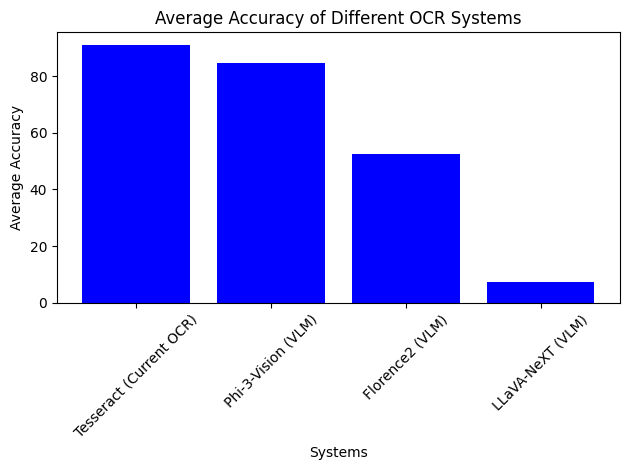

{'Tesseract (Current OCR)': 90.96349970182284, 'Phi-3-Vision (VLM)': 84.69520405164485, 'Florence2 (VLM)': 52.54992888754178, 'LLaVA-NeXT (VLM)': 7.3068034581069625}


In [6]:
accuracy = {
    'Tesseract (Current OCR)': benchmark['Tesseract Accuracy'] * 100,
    'Phi-3-Vision (VLM)': benchmark['Phi-3-Vision Accuracy'] * 100,
    'Florence2 (VLM)': benchmark['Florence2 Accuracy'] * 100,
    'LLaVA-NeXT (VLM)': benchmark['LLaVA-NeXT Accuracy'] * 100
}

accuracy_average = {key: mean(values) for key, values in accuracy.items()}

# Extract data for plotting
data_labels = list(accuracy_average.keys())
data_values = list(accuracy_average.values())

# Plotting the bar graph
fig, ax = plt.subplots()
ax.bar(data_labels, data_values, color='blue')

# Adding title and labels
ax.set_title('Average Accuracy of Different OCR Systems')
ax.set_xlabel('Systems')
ax.set_ylabel('Average Accuracy')

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(accuracy_average)

##### Second Null Hypothesis (H0): The precision of Phi-3-Vision, Florence2, or LLaVA-NeXT is equal to the precision of Tesseract.
##### Second Alternative Hypothesis (H1): The precision of Phi-3-Vision, Florence2, or LLaVA-NeXT is not equal to the precision of Tesseract.
##### Experiment: Paired Sample T-test

Paired t-test results (Phi-3-Vision vs. Tesseract): t-statistic = -22.9788, p-value = 0.0000
Paired t-test results (Florence2 vs. Tesseract): t-statistic = -91.7874, p-value = 0.0000
Paired t-test results (LLaVA-NeXT vs. Tesseract): t-statistic = -96.9454, p-value = 0.0000
The precision of Phi-3-Vision is significantly different from Tesseract (after Bonferroni correction). The null hypothesis is rejected.
The precision of Florence2 is significantly different from Tesseract (after Bonferroni correction). The null hypothesis is rejected.
The precision of LLaVA-NeXT is significantly different from Tesseract (after Bonferroni correction). The null hypothesis is rejected.


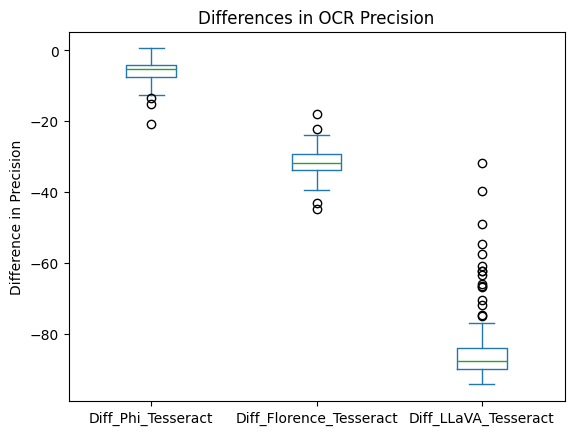

In [7]:
# Loading in the data
precision_data = {
    'Filename': benchmark['Filename'],
    'Tesseract': benchmark['Tesseract Precision'] * 100,
    'Phi-3-Vision': benchmark['Phi-3-Vision Precision'] * 100,
    'Florence2': benchmark['Florence2 Precision'] * 100,
    'LLaVA-NeXT': benchmark['LLaVA-NeXT Precision'] * 100
}

# Converting to a dataframe for experimentation
precision_df = DataFrame(precision_data)

# Calculate differences between models 
precision_df['Diff_Phi_Tesseract'] = precision_df['Phi-3-Vision'] - precision_df['Tesseract']
precision_df['Diff_Florence_Tesseract'] = precision_df['Florence2'] - precision_df['Tesseract']
precision_df['Diff_LLaVA_Tesseract'] = precision_df['LLaVA-NeXT'] - precision_df['Tesseract']

# Conducting paired sample t-tests (two-sided)
t_stat_phi_tesseract, p_value_phi_tesseract = stats.ttest_rel(precision_df['Phi-3-Vision'], precision_df['Tesseract'])
t_stat_florence_tesseract, p_value_florence_tesseract = stats.ttest_rel(precision_df['Florence2'], precision_df['Tesseract'])
t_stat_llava_tesseract, p_value_llava_tesseract = stats.ttest_rel(precision_df['LLaVA-NeXT'], precision_df['Tesseract'])

# Bonferroni Correction
alpha = 0.10
bonferroni_alpha = alpha / 3

print(f"Paired t-test results (Phi-3-Vision vs. Tesseract): t-statistic = {t_stat_phi_tesseract:.4f}, p-value = {p_value_phi_tesseract:.4f}")
print(f"Paired t-test results (Florence2 vs. Tesseract): t-statistic = {t_stat_florence_tesseract:.4f}, p-value = {p_value_florence_tesseract:.4f}")
print(f"Paired t-test results (LLaVA-NeXT vs. Tesseract): t-statistic = {t_stat_llava_tesseract:.4f}, p-value = {p_value_llava_tesseract:.4f}")

if p_value_phi_tesseract < bonferroni_alpha:
    print("The precision of Phi-3-Vision is significantly different from Tesseract (after Bonferroni correction). The null hypothesis is rejected.")
else:
    print("The precision of Phi-3-Vision is not significantly different from Tesseract (after Bonferroni correction). The null hypothesis has failed to be rejected.")

if p_value_florence_tesseract < bonferroni_alpha:
    print("The precision of Florence2 is significantly different from Tesseract (after Bonferroni correction). The null hypothesis is rejected.")
else:
    print("The precision of Florence2 is not significantly different from Tesseract (after Bonferroni correction). The null hypothesis has failed to be rejected.")

if p_value_llava_tesseract < bonferroni_alpha:
    print("The precision of LLaVA-NeXT is significantly different from Tesseract (after Bonferroni correction). The null hypothesis is rejected.")
else:
    print("The precision of LLaVA-NeXT is not significantly different from Tesseract (after Bonferroni correction). The null hypothesis has failed to be rejected.")

precision_df[['Diff_Phi_Tesseract', 'Diff_Florence_Tesseract', 'Diff_LLaVA_Tesseract']].plot(kind = 'box')
plt.title('Differences in OCR Precision')
plt.ylabel('Difference in Precision')
plt.show()

##### After running the paired t-tests, it is clear the precision of the three vision language models is significantly different that Tesseract. From the graphics above and below, it can be inferred that the precision of Tesseract is higher than that of the three VLMs.

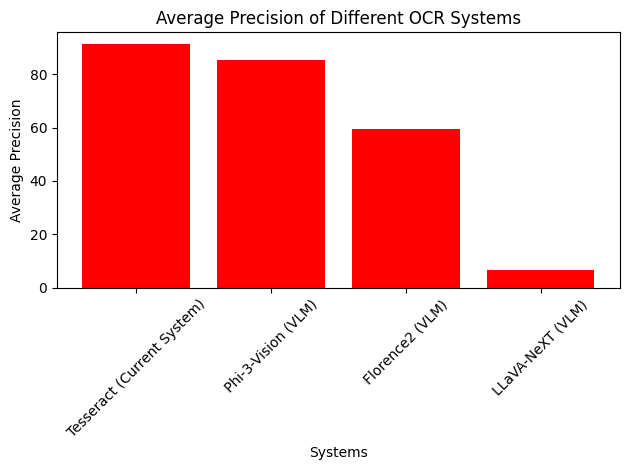

{'Tesseract (Current System)': 91.15309127441903, 'Phi-3-Vision (VLM)': 85.2452219266638, 'Florence2 (VLM)': 59.31940305859907, 'LLaVA-NeXT (VLM)': 6.644961464171835}


In [8]:
precision = {
    'Tesseract (Current System)': benchmark['Tesseract Precision'] * 100,
    'Phi-3-Vision (VLM)': benchmark['Phi-3-Vision Precision'] * 100,
    'Florence2 (VLM)': benchmark['Florence2 Precision'] * 100,
    'LLaVA-NeXT (VLM)': benchmark['LLaVA-NeXT Precision'] * 100
}

precision_average = {key: mean(values) for key, values in precision.items()}

# Extract data for plotting
data_labels = list(precision_average.keys())
data_values = list(precision_average.values())

# Plotting the bar graph
fig, ax = plt.subplots()
ax.bar(data_labels, data_values, color='red')

# Adding title and labels
ax.set_title('Average Precision of Different OCR Systems')
ax.set_xlabel('Systems')
ax.set_ylabel('Average Precision')

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(precision_average)

##### Third Null Hypothesis (H0): The recall of Phi-3-Vision, Florence2, or LLaVA-NeXT is equal to the recall of Tesseract.
##### Third Alternative Hypothesis (H1): The recall of Phi-3-Vision, Florence2, or LLaVA-NeXT is not equal to the recall of Tesseract.
##### Experiment: Paired Sample T-test

Paired t-test results (Phi-3-Vision vs. Tesseract): t-statistic = -21.4193, p-value = 0.0000
Paired t-test results (Florence2 vs. Tesseract): t-statistic = -110.5287, p-value = 0.0000
Paired t-test results (LLaVA-NeXT vs. Tesseract): t-statistic = -100.0930, p-value = 0.0000
The recall of Phi-3-Vision is significantly different from Tesseract (after Bonferroni correction). The null hypothesis is rejected.
The recall of Florence2 is significantly different from Tesseract (after Bonferroni correction). The null hypothesis is rejected.
The recall of LLaVA-NeXT is significantly different from Tesseract (after Bonferroni correction). The null hypothesis is rejected.


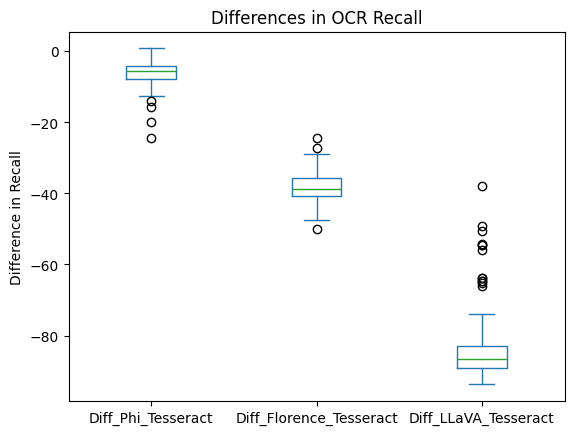

In [9]:
# Loading in the data
recall_data = {
    'Filename': benchmark['Filename'],
    'Tesseract': benchmark['Tesseract Recall'] * 100,
    'Phi-3-Vision': benchmark['Phi-3-Vision Recall'] * 100,
    'Florence2': benchmark['Florence2 Recall'] * 100,
    'LLaVA-NeXT': benchmark['LLaVA-NeXT Recall'] * 100
}

# Converting to a dataframe for experimentation
recall_df = DataFrame(recall_data)

# Calculate differences between models 
recall_df['Diff_Phi_Tesseract'] = recall_df['Phi-3-Vision'] - recall_df['Tesseract']
recall_df['Diff_Florence_Tesseract'] = recall_df['Florence2'] - recall_df['Tesseract']
recall_df['Diff_LLaVA_Tesseract'] = recall_df['LLaVA-NeXT'] - recall_df['Tesseract']

# Conducting paired sample t-tests (two-sided)
t_stat_phi_tesseract, p_value_phi_tesseract = stats.ttest_rel(recall_df['Phi-3-Vision'], recall_df['Tesseract'])
t_stat_florence_tesseract, p_value_florence_tesseract = stats.ttest_rel(recall_df['Florence2'], recall_df['Tesseract'])
t_stat_llava_tesseract, p_value_llava_tesseract = stats.ttest_rel(recall_df['LLaVA-NeXT'], recall_df['Tesseract'])

# Bonferroni Correction
alpha = 0.10
bonferroni_alpha = alpha / 3

print(f"Paired t-test results (Phi-3-Vision vs. Tesseract): t-statistic = {t_stat_phi_tesseract:.4f}, p-value = {p_value_phi_tesseract:.4f}")
print(f"Paired t-test results (Florence2 vs. Tesseract): t-statistic = {t_stat_florence_tesseract:.4f}, p-value = {p_value_florence_tesseract:.4f}")
print(f"Paired t-test results (LLaVA-NeXT vs. Tesseract): t-statistic = {t_stat_llava_tesseract:.4f}, p-value = {p_value_llava_tesseract:.4f}")

if p_value_phi_tesseract < bonferroni_alpha:
    print("The recall of Phi-3-Vision is significantly different from Tesseract (after Bonferroni correction). The null hypothesis is rejected.")
else:
    print("The recall of Phi-3-Vision is not significantly different from Tesseract (after Bonferroni correction). The null hypothesis has failed to be rejected.")

if p_value_florence_tesseract < bonferroni_alpha:
    print("The recall of Florence2 is significantly different from Tesseract (after Bonferroni correction). The null hypothesis is rejected.")
else:
    print("The recall of Florence2 is not significantly different from Tesseract (after Bonferroni correction). The null hypothesis has failed to be rejected.")

if p_value_llava_tesseract < bonferroni_alpha:
    print("The recall of LLaVA-NeXT is significantly different from Tesseract (after Bonferroni correction). The null hypothesis is rejected.")
else:
    print("The recall of LLaVA-NeXT is not significantly different from Tesseract (after Bonferroni correction). The null hypothesis has failed to be rejected.")

recall_df[['Diff_Phi_Tesseract', 'Diff_Florence_Tesseract', 'Diff_LLaVA_Tesseract']].plot(kind = 'box')
plt.title('Differences in OCR Recall')
plt.ylabel('Difference in Recall')
plt.show()

##### After running the paired t-tests, it is clear the recall of the three vision language models is significantly different that Tesseract. From the graphics above and below, it can be inferred that the recall of Tesseract is higher than that of the three VLMs.

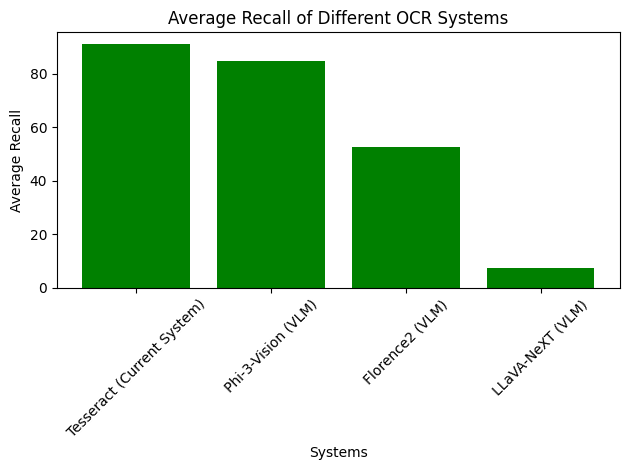

{'Tesseract (Current System)': 90.96349970182284, 'Phi-3-Vision (VLM)': 84.69520405164485, 'Florence2 (VLM)': 52.54992888754178, 'LLaVA-NeXT (VLM)': 7.3068034581069625}


In [10]:
recall = {
    'Tesseract (Current System)': benchmark['Tesseract Recall'] * 100,
    'Phi-3-Vision (VLM)': benchmark['Phi-3-Vision Recall'] * 100,
    'Florence2 (VLM)': benchmark['Florence2 Recall'] * 100,
    'LLaVA-NeXT (VLM)': benchmark['LLaVA-NeXT Recall'] * 100
}

recall_average = {key: mean(values) for key, values in recall.items()}

# Extract data for plotting
data_labels = list(recall_average.keys())
data_values = list(recall_average.values())

# Plotting the bar graph
fig, ax = plt.subplots()
ax.bar(data_labels, data_values, color='green')

# Adding title and labels
ax.set_title('Average Recall of Different OCR Systems')
ax.set_xlabel('Systems')
ax.set_ylabel('Average Recall')

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(recall_average)

##### Fourth Null Hypothesis (H0): The character error rate of Phi-3-Vision, Florence2, or LLaVA-NeXT is equal to the character error rate of Tesseract.
##### Fourth Alternative Hypothesis (H1): The character error rate of Phi-3-Vision, Florence2, or LLaVA-NeXT is not equal to the character error rate of Tesseract.
##### Experiment: Paired Sample T-test

Paired t-test results (Phi-3-Vision vs. Tesseract): t-statistic = 7.2024, p-value = 0.0000
Paired t-test results (Florence2 vs. Tesseract): t-statistic = 57.5539, p-value = 0.0000
Paired t-test results (LLaVA-NeXT vs. Tesseract): t-statistic = 22.2893, p-value = 0.0000
The Character Error Rate of Phi-3-Vision is significantly different from Tesseract (after Bonferroni correction). The null hypothesis is rejected.
The Character Error Rate of Florence2 is significantly different from Tesseract (after Bonferroni correction). The null hypothesis is rejected.
The Character Error Rate of LLaVA-NeXT is significantly different from Tesseract (after Bonferroni correction). The null hypothesis is rejected.


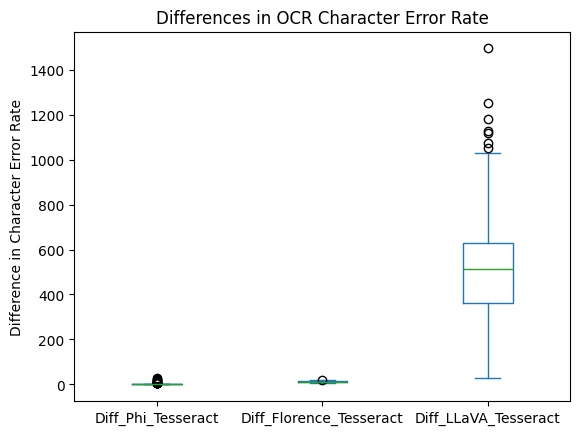

In [11]:
# Loading in the data
cer_data = {
    'Filename': benchmark['Filename'],
    'Tesseract': benchmark['Tesseract CER'] * 100,
    'Phi-3-Vision': benchmark['Phi-3-Vision CER'] * 100,
    'Florence2': benchmark['Florence2 CER'] * 100,
    'LLaVA-NeXT': benchmark['LLaVA-NeXT CER'] * 100
}

# Converting to a dataframe for experimentation
cer_df = DataFrame(cer_data)

# Calculate differences between models 
cer_df['Diff_Phi_Tesseract'] = cer_df['Phi-3-Vision'] - cer_df['Tesseract']
cer_df['Diff_Florence_Tesseract'] = cer_df['Florence2'] - cer_df['Tesseract']
cer_df['Diff_LLaVA_Tesseract'] = cer_df['LLaVA-NeXT'] - cer_df['Tesseract']

# Conducting paired sample t-tests (two-sided)
t_stat_phi_tesseract, p_value_phi_tesseract = stats.ttest_rel(cer_df['Phi-3-Vision'], cer_df['Tesseract'])
t_stat_florence_tesseract, p_value_florence_tesseract = stats.ttest_rel(cer_df['Florence2'], cer_df['Tesseract'])
t_stat_llava_tesseract, p_value_llava_tesseract = stats.ttest_rel(cer_df['LLaVA-NeXT'], cer_df['Tesseract'])

# Bonferroni Correction
alpha = 0.10
bonferroni_alpha = alpha / 3

print(f"Paired t-test results (Phi-3-Vision vs. Tesseract): t-statistic = {t_stat_phi_tesseract:.4f}, p-value = {p_value_phi_tesseract:.4f}")
print(f"Paired t-test results (Florence2 vs. Tesseract): t-statistic = {t_stat_florence_tesseract:.4f}, p-value = {p_value_florence_tesseract:.4f}")
print(f"Paired t-test results (LLaVA-NeXT vs. Tesseract): t-statistic = {t_stat_llava_tesseract:.4f}, p-value = {p_value_llava_tesseract:.4f}")

if p_value_phi_tesseract < bonferroni_alpha:
    print("The Character Error Rate of Phi-3-Vision is significantly different from Tesseract (after Bonferroni correction). The null hypothesis is rejected.")
else:
    print("The Character Error Rate of Phi-3-Vision is not significantly different from Tesseract (after Bonferroni correction). The null hypothesis has failed to be rejected.")

if p_value_florence_tesseract < bonferroni_alpha:
    print("The Character Error Rate of Florence2 is significantly different from Tesseract (after Bonferroni correction). The null hypothesis is rejected.")
else:
    print("The Character Error Rate of Florence2 is not significantly different from Tesseract (after Bonferroni correction). The null hypothesis has failed to be rejected.")

if p_value_llava_tesseract < bonferroni_alpha:
    print("The Character Error Rate of LLaVA-NeXT is significantly different from Tesseract (after Bonferroni correction). The null hypothesis is rejected.")
else:
    print("The Character Error Rate of LLaVA-NeXT is not significantly different from Tesseract (after Bonferroni correction). The null hypothesis has failed to be rejected.")

cer_df[['Diff_Phi_Tesseract', 'Diff_Florence_Tesseract', 'Diff_LLaVA_Tesseract']].plot(kind = 'box')
plt.title('Differences in OCR Character Error Rate')
plt.ylabel('Difference in Character Error Rate')
plt.show()

##### After running the paired t-tests, it is clear the character error rate of the three vision language models is significantly different that Tesseract. From the graphics above and below, it can be inferred that the character error rate of Tesseract is lower than that of the three VLMs.

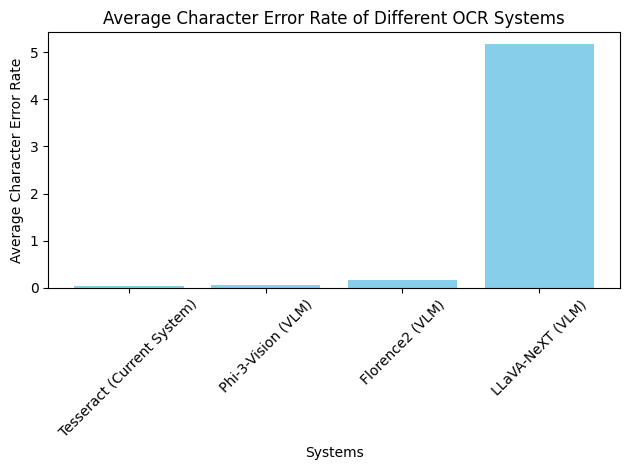

{'Tesseract (Current System)': 0.0357577730026291, 'Phi-3-Vision (VLM)': 0.062251864883917485, 'Florence2 (VLM)': 0.15720529850144369, 'LLaVA-NeXT (VLM)': 5.166962913627106}


In [12]:
cer = {
    'Tesseract (Current System)': benchmark['Tesseract CER'] ,
    'Phi-3-Vision (VLM)': benchmark['Phi-3-Vision CER'] ,
    'Florence2 (VLM)': benchmark['Florence2 CER'],
    'LLaVA-NeXT (VLM)': benchmark['LLaVA-NeXT CER']
}

cer_average = {key: mean(values) for key, values in cer.items()}

# Extract data for plotting
data_labels = list(cer_average.keys())
data_values = list(cer_average.values())

# Plotting the bar graph
fig, ax = plt.subplots()
ax.bar(data_labels, data_values, color='skyblue')

# Adding title and labels
ax.set_title('Average Character Error Rate of Different OCR Systems')
ax.set_xlabel('Systems')
ax.set_ylabel('Average Character Error Rate')

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(cer_average)

##### Fifth Null Hypothesis (H0): The word error rate of Phi-3-Vision, Florence2, or LLaVA-NeXT is equal to the word error rate of Tesseract.
##### Fifth Alternative Hypothesis (H1): The word error rate of Phi-3-Vision, Florence2, or LLaVA-NeXT is not equal to the word error rate of Tesseract.
##### Experiment: Paired Sample T-test

Paired t-test results (Phi-3-Vision vs. Tesseract): t-statistic = 20.2887, p-value = 0.0000
Paired t-test results (Florence2 vs. Tesseract): t-statistic = 122.2452, p-value = 0.0000
Paired t-test results (LLaVA-NeXT vs. Tesseract): t-statistic = 21.7720, p-value = 0.0000
The Word Error Rate of Phi-3-Vision is significantly different from Tesseract (after Bonferroni correction). The null hypothesis is rejected.
The Word Error Rate of Florence2 is significantly different from Tesseract (after Bonferroni correction). The null hypothesis is rejected.
The Word Error Rate of LLaVA-NeXT is significantly different from Tesseract (after Bonferroni correction). The null hypothesis is rejected.


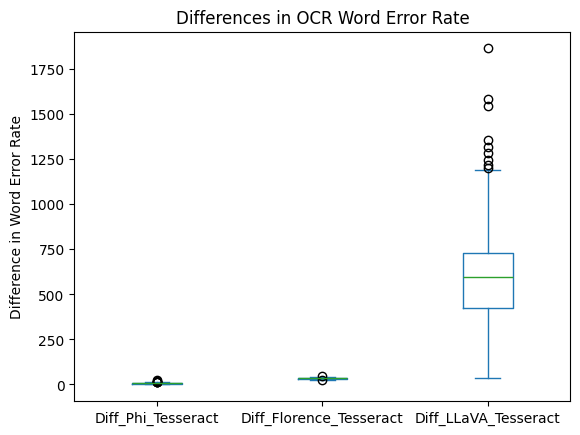

In [13]:
# Loading in the data
wer_data = {
    'Filename': benchmark['Filename'],
    'Tesseract': benchmark['Tesseract WER'] * 100,
    'Phi-3-Vision': benchmark['Phi-3-Vision WER'] * 100,
    'Florence2': benchmark['Florence2 WER'] * 100,
    'LLaVA-NeXT': benchmark['LLaVA-NeXT WER'] * 100
}

# Converting to a dataframe for experimentation
wer_df = DataFrame(wer_data)

# Calculate differences between models 
wer_df['Diff_Phi_Tesseract'] = wer_df['Phi-3-Vision'] - wer_df['Tesseract']
wer_df['Diff_Florence_Tesseract'] = wer_df['Florence2'] - wer_df['Tesseract']
wer_df['Diff_LLaVA_Tesseract'] = wer_df['LLaVA-NeXT'] - wer_df['Tesseract']

# Conducting paired sample t-tests (two-sided)
t_stat_phi_tesseract, p_value_phi_tesseract = stats.ttest_rel(wer_df['Phi-3-Vision'], wer_df['Tesseract'])
t_stat_florence_tesseract, p_value_florence_tesseract = stats.ttest_rel(wer_df['Florence2'], wer_df['Tesseract'])
t_stat_llava_tesseract, p_value_llava_tesseract = stats.ttest_rel(wer_df['LLaVA-NeXT'], wer_df['Tesseract'])

# Bonferroni Correction
alpha = 0.10
bonferroni_alpha = alpha / 3

print(f"Paired t-test results (Phi-3-Vision vs. Tesseract): t-statistic = {t_stat_phi_tesseract:.4f}, p-value = {p_value_phi_tesseract:.4f}")
print(f"Paired t-test results (Florence2 vs. Tesseract): t-statistic = {t_stat_florence_tesseract:.4f}, p-value = {p_value_florence_tesseract:.4f}")
print(f"Paired t-test results (LLaVA-NeXT vs. Tesseract): t-statistic = {t_stat_llava_tesseract:.4f}, p-value = {p_value_llava_tesseract:.4f}")

if p_value_phi_tesseract < bonferroni_alpha:
    print("The Word Error Rate of Phi-3-Vision is significantly different from Tesseract (after Bonferroni correction). The null hypothesis is rejected.")
else:
    print("The Word Error Rate of Phi-3-Vision is not significantly different from Tesseract (after Bonferroni correction). The null hypothesis has failed to be rejected.")

if p_value_florence_tesseract < bonferroni_alpha:
    print("The Word Error Rate of Florence2 is significantly different from Tesseract (after Bonferroni correction). The null hypothesis is rejected.")
else:
    print("The Word Error Rate of Florence2 is not significantly different from Tesseract (after Bonferroni correction). The null hypothesis has failed to be rejected.")

if p_value_llava_tesseract < bonferroni_alpha:
    print("The Word Error Rate of LLaVA-NeXT is significantly different from Tesseract (after Bonferroni correction). The null hypothesis is rejected.")
else:
    print("The Word Error Rate of LLaVA-NeXT is not significantly different from Tesseract (after Bonferroni correction). The null hypothesis has failed to be rejected.")

wer_df[['Diff_Phi_Tesseract', 'Diff_Florence_Tesseract', 'Diff_LLaVA_Tesseract']].plot(kind = 'box')
plt.title('Differences in OCR Word Error Rate')
plt.ylabel('Difference in Word Error Rate')
plt.show()

##### After running the paired t-tests, it is clear the word error rate of the three vision language models is significantly different that Tesseract. From the graphics above and below, it can be inferred that the word error rate of Tesseract is lower than that of the three VLMs.

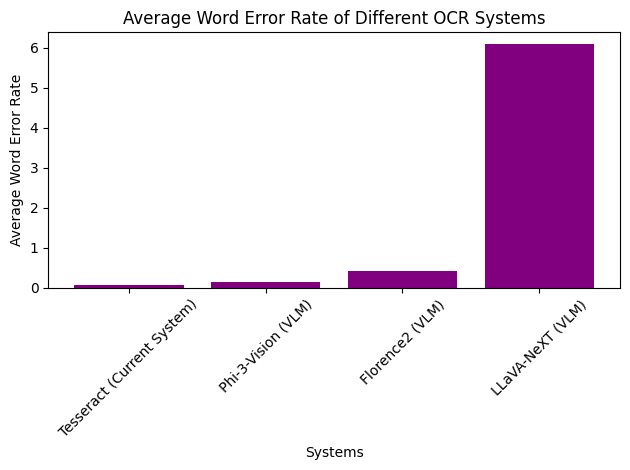

{'Tesseract (Current System)': 0.07389071584964886, 'Phi-3-Vision (VLM)': 0.13523385607780203, 'Florence2 (VLM)': 0.40924660654190675, 'LLaVA-NeXT (VLM)': 6.08523080646332}


In [14]:
wer = {
    'Tesseract (Current System)': benchmark['Tesseract WER'] ,
    'Phi-3-Vision (VLM)': benchmark['Phi-3-Vision WER'] ,
    'Florence2 (VLM)': benchmark['Florence2 WER'],
    'LLaVA-NeXT (VLM)': benchmark['LLaVA-NeXT WER']
}

wer_average = {key: mean(values) for key, values in wer.items()}

# Extract data for plotting
data_labels = list(wer_average.keys())
data_values = list(wer_average.values())

# Plotting the bar graph
fig, ax = plt.subplots()
ax.bar(data_labels, data_values, color='purple')

# Adding title and labels
ax.set_title('Average Word Error Rate of Different OCR Systems')
ax.set_xlabel('Systems')
ax.set_ylabel('Average Word Error Rate')

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(wer_average)

#### **Conclusion:**
##### After running several hypothesis tests, the conclusion can be made that Tesseract still outperforms Phi-3-Vision, Florence2, and LLaVA-NeXT in nearly every metric that was measured for this analysis. However, there are three things that need to be front of mind when considering the results of the hypothesis tests. The first note is that the field of vision language models is still fairly novel as open source vision models and will continue to improve as new models are released and updated. The second note is that none of these vision language models were fine-tuned specifically for conducting optical character recognition and thus it can be assumed that with fine tuning there will be better results when compared to Tesseract. The final note is that Phi-3.5 was recently released and is expected to outperform Phi-3, which was already the leading vision language model from this project.

#### **Searchability:**
##### After presenting, I wanted to look into the searchability of the different models just to see how it compared. My initial thought was that Phi-3-Vision would be nearly equal in searchability to Tesseract, with Florence2 and LLaVA-NeXT lagging behind.

In [34]:
phi_searchability = read_csv('/home/darshewskijadmin@consilio.com/ExperimentalLLMs/Data/Phi_Searchability.csv')
tesseract_searchability = read_csv('/home/darshewskijadmin@consilio.com/ExperimentalLLMs/Data/Tesseract_Searchability.csv')

phi_searchability.rename(columns = {'OCR File': 'Phi-3-Vision File', 'Missing Percentage': 'Phi-3-Vision Missing Percentage', 'Changed Percentage': 'Phi-3-Vision Changed Percentage'},
                         inplace = True)
tesseract_searchability.rename(columns = {'OCR File': 'Tesseract File', 'Missing Percentage': 'Tesseract Missing Percentage', 'Changed Percentage': 'Tesseract Changed Percentage'},
                               inplace = True)

phi_searchability['Phi-3-Vision Missing Percentage'] = phi_searchability['Phi-3-Vision Missing Percentage'].str.replace('%','').astype(float)
phi_searchability['Phi-3-Vision Changed Percentage'] = phi_searchability['Phi-3-Vision Changed Percentage'].str.replace('%','').astype(float)

tesseract_searchability['Tesseract Missing Percentage'] = tesseract_searchability['Tesseract Missing Percentage'].str.replace('%','').astype(float)
tesseract_searchability['Tesseract Changed Percentage'] = tesseract_searchability['Tesseract Changed Percentage'].str.replace('%','').astype(float)

searchability = merge(phi_searchability, tesseract_searchability, on = 'Ground Truth File')

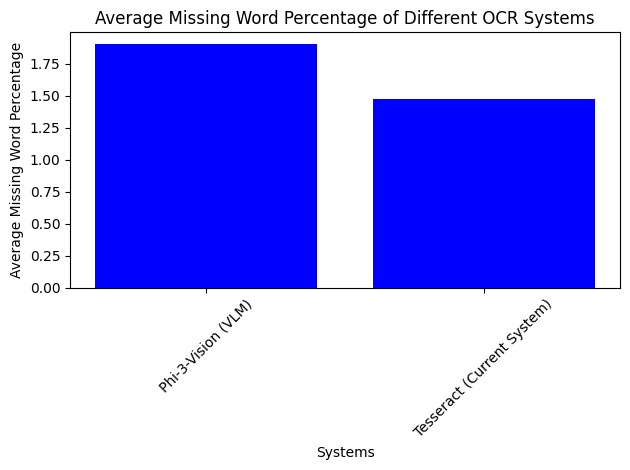

{'Phi-3-Vision (VLM)': 1.9016176470588235, 'Tesseract (Current System)': 1.4769117647058825}


In [35]:
missing_word_data = {
    'Phi-3-Vision (VLM)': searchability['Phi-3-Vision Missing Percentage'],
    'Tesseract (Current System)': searchability['Tesseract Missing Percentage'] 
}

missing_word_average = {key: mean(values) for key, values in missing_word_data.items()}

# Extract data for plotting
data_labels = list(missing_word_average.keys())
data_values = list(missing_word_average.values())

# Plotting the bar graph
fig, ax = plt.subplots()
ax.bar(data_labels, data_values, color='blue')

# Adding title and labels
ax.set_title('Average Missing Word Percentage of Different OCR Systems')
ax.set_xlabel('Systems')
ax.set_ylabel('Average Missing Word Percentage')

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(missing_word_average)

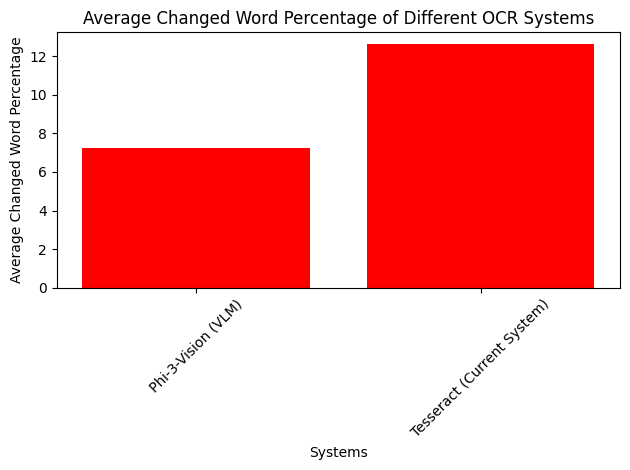

{'Phi-3-Vision (VLM)': 7.258970588235294, 'Tesseract (Current System)': 12.61691176470588}


In [36]:
changed_word_data = {
    'Phi-3-Vision (VLM)': searchability['Phi-3-Vision Changed Percentage'],
    'Tesseract (Current System)': searchability['Tesseract Changed Percentage'] 
}

changed_word_average = {key: mean(values) for key, values in changed_word_data.items()}

# Extract data for plotting
data_labels = list(changed_word_average.keys())
data_values = list(changed_word_average.values())

# Plotting the bar graph
fig, ax = plt.subplots()
ax.bar(data_labels, data_values, color='red')

# Adding title and labels
ax.set_title('Average Changed Word Percentage of Different OCR Systems')
ax.set_xlabel('Systems')
ax.set_ylabel('Average Changed Word Percentage')

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(changed_word_average)

##### The cells below were exploratory analysis into Phi-3.5-Vision, which had issues that I believe were because I could not get it running on vLLM in a timely manner. 

In [39]:
phi_evolved = read_csv('/home/darshewskijadmin@consilio.com/ExperimentalLLMs/Data/final_merged_results.csv')
phi_evolved = phi_evolved[['Ground Truth File', 'Number of Pages', 'Accuracy', 'Precision']]
phi_evolved

,Ground Truth File,Number of Pages,Accuracy,Precision
0,Chapter8.txt,3,0.446032,0.672929
1,Chapter70.txt,3,0.524138,0.684147
2,Chapter99.txt,7,0.000636,0.031161
3,Chapter102.txt,5,0.005454,0.048533
4,Chapter113.txt,4,0.306755,0.583346
...,...,...,...,...
131,Chapter16.txt,16,0.000000,0.000000
132,Chapter119.txt,8,0.183857,0.581817
133,Chapter110.txt,7,0.124173,0.473805
134,Chapter44.txt,7,0.000000,0.000000


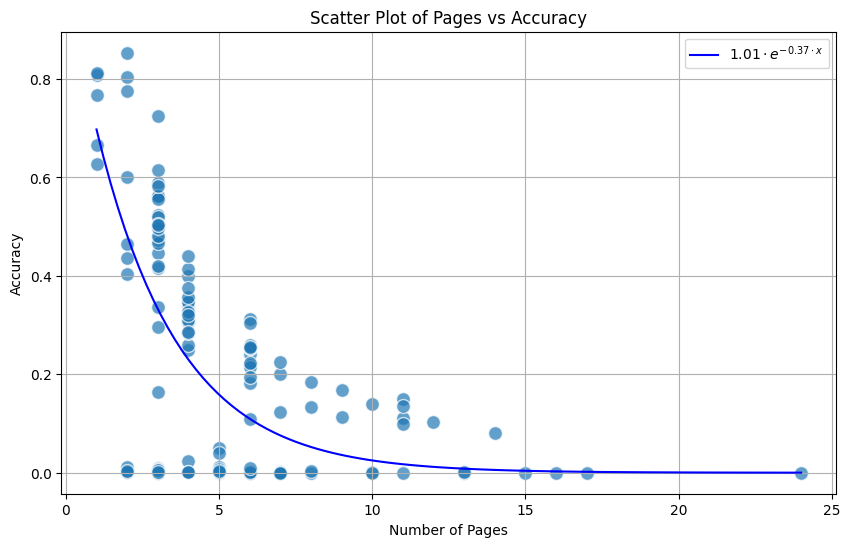

In [46]:
# Specific equation parameters
a_specific = 1.01
b_specific = -0.37

# Define the exponential function for the specific equation
def specific_exp_decline(x):
    return a_specific * exp(b_specific * x)

plt.figure(figsize=(10, 6))
plt.scatter(phi_evolved['Number of Pages'], phi_evolved['Accuracy'], alpha=0.7, edgecolors='w', s=100)

x_values = linspace(min(phi_evolved['Number of Pages']), max(phi_evolved['Number of Pages']), 100)
plt.plot(x_values, specific_exp_decline(x_values), color='blue', label=r'$1.01 \cdot e^{-0.37 \cdot x}$')
    

# Adding title and labels
plt.title('Scatter Plot of Pages vs Accuracy')
plt.xlabel('Number of Pages')
plt.ylabel('Accuracy')

plt.legend()

# Show the plot
plt.grid(True)
plt.show()

/tmp/ipykernel_2074611/2984279359.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


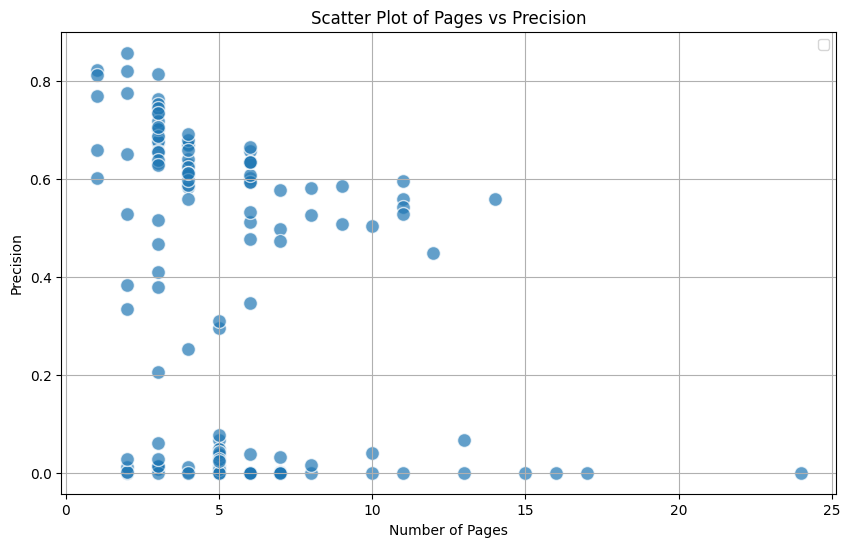

In [47]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(phi_evolved['Number of Pages'], phi_evolved['Precision'], alpha=0.7, edgecolors='w', s=100)

# Adding title and labels
plt.title('Scatter Plot of Pages vs Precision')
plt.xlabel('Number of Pages')
plt.ylabel('Precision')

plt.legend()

# Show the plot
plt.grid(True)
plt.show()